In [6]:
from keras.datasets import mnist
import tensorflow.keras as keras
import numpy as np

np.random.seed(10)

# Load the MNIST dataset # many hand wirte number
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

# Reshape the image data
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float32')


In [40]:
len(y_Train)

60000

In [7]:
# 將 features 標準化
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

# Perform one-hot encoding for labels
num_classes = 10  # Number of classes (digits 0-9)

y_TrainOneHot = keras.utils.to_categorical(y_Train, num_classes)
y_TestOneHot = keras.utils.to_categorical(y_Test, num_classes)

#########
## step 2 建立模型：建立 CNN model
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

# 線性堆疊模型
model = Sequential()

In [38]:
y_TrainOneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [8]:
# 建立卷積層1
# 輸入數字影像 28x28 的大小，執行一次卷積運算，產生 16 個影像，卷積運算不會改變影像大小，結果還是 28x28
# filters=16             建立 16 個 filter weight
# kernel_size=(5,5)      每一個濾鏡大小為 5x5
# padding='same'         讓卷積運算產生的影像大小不變
# input_shape=(28,28,1)  第1, 2 維，是輸入的影像形狀 28x28，第 3 維，因為是單色灰階影像，所以是 1
# activation='relu'      設定 ReLU 激活函數
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))


In [11]:
# 建立池化層
# 輸入參數 pool_size=(2, 2)，執行第一次縮減取樣，將 16 個 28x28 影像，縮小為 16 個 14x14 的影像
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
# 建立卷積層2
# 執行第二次卷積運算，將原本的 16 個影像，轉換為 36 個影像，卷積運算不會改變影像大小，結果還是 14x14
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [13]:
# 建立池化層2，並加入Dropout 避免 overfitting
# 執行第二次縮減取樣，將 36 個 14x14 的影像，縮小為 36 個 7x7 的影像
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [14]:
# 建立神經網路 (平坦層, 隱藏層, 輸出層)
# 建立平坦層
# 根據池化層2 的結果，共36 個 7x7 影像，轉換為 1維向量，長度是 36x7x7=1764，也就是 1764 個 float，正好對應到 1764 個神經元
model.add(Flatten())
# 建立隱藏層，共有 128 個神經元
model.add(Dense(128, activation='relu'))
# 加入 Dropout(0.5)
# 每次訓練迭代時，會隨機在神經網路中，放棄 50% 的神經元，以避免 overfitting
model.add(Dropout(0.5))
# 建立輸出層
# 共 10 個神經元，對應 0~9 共 10 個數字，並使用 softmax 激活函數進行轉換
# softmax 可將神經元的輸出，轉換為預測每一個數字的機率
model.add(Dense(10,activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 36)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 36)          0         
                                                                 
 flatten (Flatten)           (None, 1764)              0

In [15]:
#######
## 訓練模型：輸入 features, label，執行 10 次訓練週期
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

# validation_split=0.2   80% 為訓練資料, 20% 驗證資料
# batch_size=300         每一批次300 筆資料
# verbose=2              顯示訓練過程
train_history=model.fit(x=x_Train4D_normalize,
                        y=y_TrainOneHot,validation_split=0.2,
                        epochs=20, batch_size=300,verbose=2)

Epoch 1/20
160/160 - 14s - loss: 0.4918 - accuracy: 0.8461 - val_loss: 0.1036 - val_accuracy: 0.9685 - 14s/epoch - 85ms/step
Epoch 2/20
160/160 - 13s - loss: 0.1404 - accuracy: 0.9589 - val_loss: 0.0666 - val_accuracy: 0.9797 - 13s/epoch - 81ms/step
Epoch 3/20
160/160 - 14s - loss: 0.0988 - accuracy: 0.9707 - val_loss: 0.0514 - val_accuracy: 0.9848 - 14s/epoch - 85ms/step
Epoch 4/20
160/160 - 17s - loss: 0.0814 - accuracy: 0.9762 - val_loss: 0.0461 - val_accuracy: 0.9860 - 17s/epoch - 104ms/step
Epoch 5/20
160/160 - 17s - loss: 0.0696 - accuracy: 0.9784 - val_loss: 0.0422 - val_accuracy: 0.9873 - 17s/epoch - 105ms/step
Epoch 6/20
160/160 - 15s - loss: 0.0605 - accuracy: 0.9820 - val_loss: 0.0402 - val_accuracy: 0.9883 - 15s/epoch - 95ms/step
Epoch 7/20
160/160 - 14s - loss: 0.0561 - accuracy: 0.9834 - val_loss: 0.0394 - val_accuracy: 0.9884 - 14s/epoch - 90ms/step
Epoch 8/20
160/160 - 14s - loss: 0.0501 - accuracy: 0.9850 - val_loss: 0.0371 - val_accuracy: 0.9895 - 14s/epoch - 90ms/ste

In [16]:
# 模型訓練結果 結構存檔
from keras.models import model_from_json
json_string = model.to_json()
with open("model.config", "w") as text_file:
    text_file.write(json_string)

In [17]:
import matplotlib.pyplot as plt
def save_train_history(train_acc,test_acc, filename):
    plt.clf()
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig(filename)

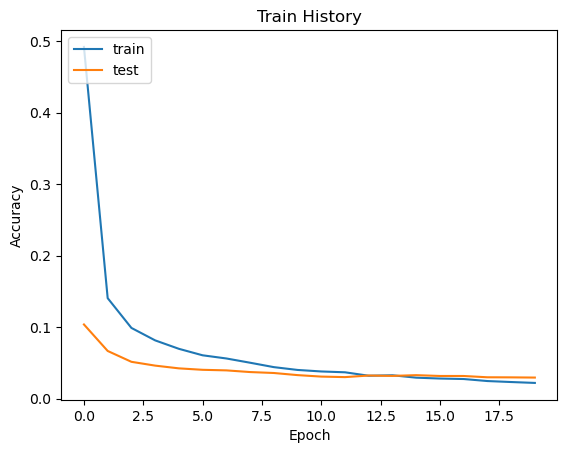

In [18]:
save_train_history('accuracy','val_accuracy', 'acc.png')

save_train_history('loss','val_loss', 'loss.png')

In [35]:
#####
# step 4 評估模型準確率：使用測試資料評估模型準確率

scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

#####
# step 5 預測：利用 model，輸入測試資料進行預測
prediction = model.predict(x_Test4D_normalize)

# # Extract the class labels with the highest probability as predictions
prediction = np.argmax(predictions, axis=1)

# # Display the first 10 predicted classes
prediction[:10]


313/313 [==============================] - 1s 5ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

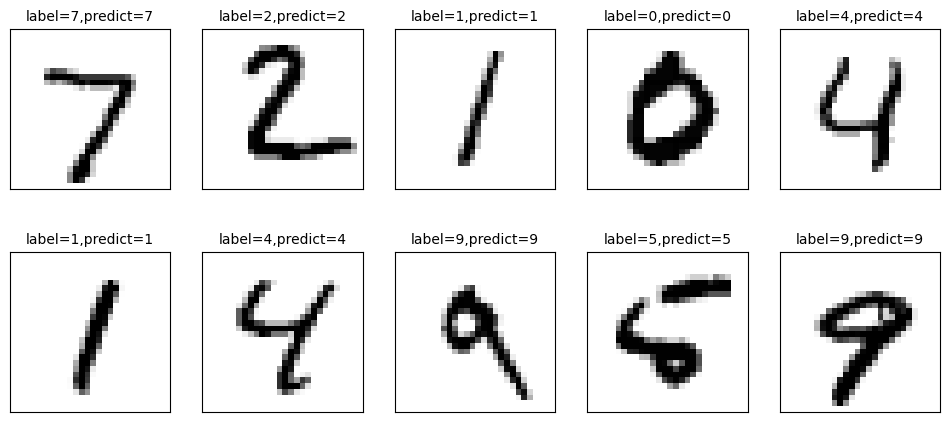

In [36]:
# 查看預測結果
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,filename, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10)

        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.savefig(filename)
    
plot_images_labels_prediction(x_Test,y_Test, prediction, 'predict.png', idx=0)

In [37]:
####
# confusion maxtrix

import pandas as pd
crosstab1 = pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

print()
print(crosstab1)

df = pd.DataFrame({'label':y_Test, 'predict':prediction})

df[(df.label==5)&(df.predict==3)]


predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        978     0     0     1    0    0    0     0    1    0
1          0  1134     1     0    0    0    0     0    0    0
2          0     0  1030     0    0    0    0     2    0    0
3          0     0     1  1005    0    2    0     1    1    0
4          0     0     0     0  975    0    0     1    2    4
5          1     0     0     7    0  882    1     0    0    1
6          3     2     1     0    3    3  944     0    2    0
7          0     2     5     2    0    0    0  1017    1    1
8          2     0     1     2    0    0    0     2  965    2
9          0     1     1     1    3    5    0     2    0  996


,label,predict
340,5,3
674,5,3
1393,5,3
2369,5,3
2597,5,3
4360,5,3
5937,5,3
